# Model

## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from minisom import MiniSom
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

In [4]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

In [5]:
cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0.0,0.0,0.0,2.0,91.0,20.0,22.0,22.0,...,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397,23,HS,1
19330,Donald Robertson,1981-06-26 22:58:00,1.0,0.0,0.0,2.0,197.0,5958.0,21.0,20.0,...,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197,41,HS,0
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1.0,1.0,0.0,20.0,397.0,20.0,9.0,310.0,...,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113,36,Phd.,1
25288,Emma Williams,1942-06-17 00:02:00,3.0,4.0,1.0,2.0,5282.0,237.0,12.0,499.0,...,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589,80,HS,1
12829,Hilda Huerta,2000-01-31 11:43:00,0.0,0.0,0.0,2.0,82.0,22.0,21.0,9.0,...,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970,23,HS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0.0,0.0,1.0,2.0,209.0,5474.0,20.0,18.0,...,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911,48,Phd.,1
26447,Curtis Thompson,1986-02-21 11:27:00,0.0,0.0,0.0,3.0,185.0,1066.0,15.0,267.0,...,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301,37,HS,0
182,Richard Carter,2001-01-14 05:49:00,0.0,0.0,0.0,2.0,83.0,23.0,23.0,23.0,...,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140,22,HS,0


In [6]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude', 'longitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female
customer_id,,,,,,,,,,,,,,,,,,,
4239,0.0,0.0,0.0,2.0,91.0,20.0,22.0,22.0,195.0,964.0,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,23,1
19330,1.0,0.0,0.0,2.0,197.0,5958.0,21.0,20.0,1435.0,434.0,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,41,0
2272,1.0,1.0,0.0,20.0,397.0,20.0,9.0,310.0,379.0,222.0,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,36,1
25288,3.0,4.0,1.0,2.0,5282.0,237.0,12.0,499.0,873.0,460.0,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,80,1
12829,0.0,0.0,0.0,2.0,82.0,22.0,21.0,9.0,172.0,856.0,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.0,0.0,1.0,2.0,209.0,5474.0,20.0,18.0,1435.0,521.0,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,48,1
26447,0.0,0.0,0.0,3.0,185.0,1066.0,15.0,267.0,276.0,287.0,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,37,0
182,0.0,0.0,0.0,2.0,83.0,23.0,23.0,23.0,189.0,921.0,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,22,0


## 3. Data Scaling and Normalization

In [7]:
import numpy as np

# check if there are any infinite values
print(np.isinf(num_cust_info).any())

# check if there are any missing values
print(np.isnan(num_cust_info).any())


kids_home                                  False
teens_home                                 False
number_complaints                          False
distinct_stores_visited                    False
lifetime_spend_groceries                   False
lifetime_spend_electronics                 False
typical_hour                                True
lifetime_spend_vegetables                  False
lifetime_spend_nonalcohol_drinks           False
lifetime_spend_alcohol_drinks              False
lifetime_spend_meat                        False
lifetime_spend_fish                        False
lifetime_spend_hygiene                     False
lifetime_spend_videogames                   True
lifetime_total_distinct_products           False
percentage_of_products_bought_promotion    False
year_first_transaction                     False
age                                        False
female                                     False
dtype: bool
kids_home                                  False
teens_ho

# ATENÇÃO AS VARIAVEIS TYPICAL_HOUR E LIFETIME_SPEND_VIDEOGAMES

In [8]:
num_cust_info = num_cust_info.drop(['typical_hour', 'lifetime_spend_videogames'], axis = 1)

In [9]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

## 4. K-Means

In [10]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

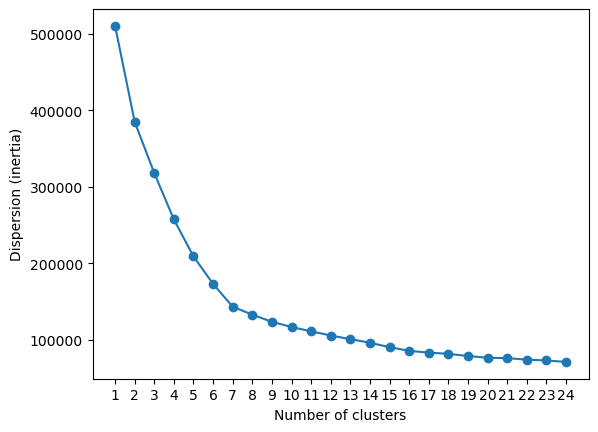

In [11]:
plt.plot(range(1, 25), dispersion, marker='o')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [13]:
num_cust_info.groupby(['cluster_kmeans']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female
cluster_kmeans,,,,,,,,,,,,,,,,,
0,3.091242,1.819023,0.934151,3.007532,4997.324080,199.998709,602.092318,900.802668,500.878416,1100.438563,1101.488918,501.178395,2001.484183,0.200117,2009.950721,55.583172,0.500323
1,0.271578,0.208361,0.257923,2.369521,2955.294167,620.596763,276.922623,315.227748,466.107384,358.765003,358.291639,108.652225,239.789278,0.143063,2011.408631,37.134019,0.503034
2,0.984252,0.084646,1.158661,19.407087,299.576772,19.682087,293.958268,294.150787,202.781693,147.908268,146.403543,50.000000,487.065551,0.490581,2010.011220,55.744882,0.490157
3,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,20.033623,1500.946855,499.866161,57.739913,58.946421,49.912148,99.785249,0.100002,2009.978091,55.672234,0.494143
4,0.997692,0.271507,1.550776,7.997482,14989.130718,199.977549,799.505245,900.759337,599.122954,1500.893621,1498.612044,200.087285,4010.636802,0.149976,2000.007344,55.575115,0.500000
5,1.158683,0.772104,0.311880,1.999367,996.228529,51.718084,1495.889850,20.964972,20.523317,0.635999,0.675459,99.846592,199.213547,0.050152,2010.012028,55.411057,0.490610
6,0.000000,0.000000,0.000000,1.000000,2.701444,1.149498,2.124160,2.302082,2.704784,2.615967,34997.747788,1.553669,0.977930,0.200151,2010.030973,49.955752,0.553097


In [14]:
num_cust_info.mean()

kids_home                                     1.146700
teens_home                                    0.512933
number_complaints                             0.764367
distinct_stores_visited                       6.120767
lifetime_spend_groceries                   3978.634251
lifetime_spend_electronics                  965.238793
lifetime_spend_vegetables                   564.207835
lifetime_spend_nonalcohol_drinks            628.750142
lifetime_spend_alcohol_drinks               379.344543
lifetime_spend_meat                         513.878374
lifetime_spend_fish                         777.151833
lifetime_spend_hygiene                      162.824538
lifetime_total_distinct_products           1123.887300
percentage_of_products_bought_promotion       0.190981
year_first_transaction                     2008.684067
age                                          51.905367
female                                        0.497000
cluster_kmeans                                2.467900
dtype: flo

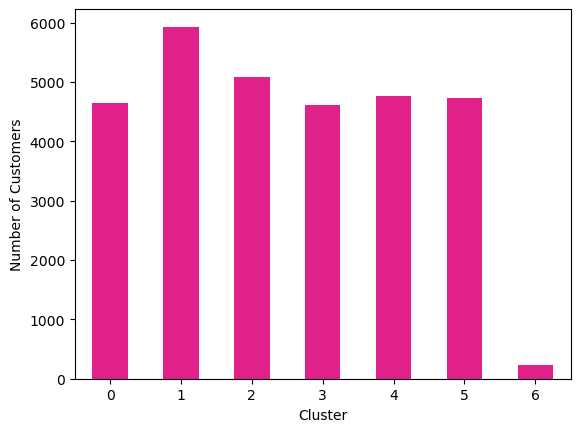

In [15]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

## 5. Hierarchical Clustering

In [ ]:
minimum_hierarchical = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

In [21]:
def plot_dendrogram(model, **kwargs):
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments: 
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

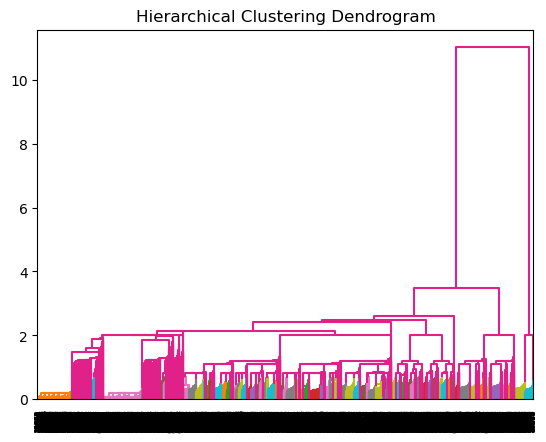

In [22]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(minimum_hierarchical, truncate_mode="level", p=50, color_threshold=0.7, above_threshold_color='#e0218a')
plt.show()

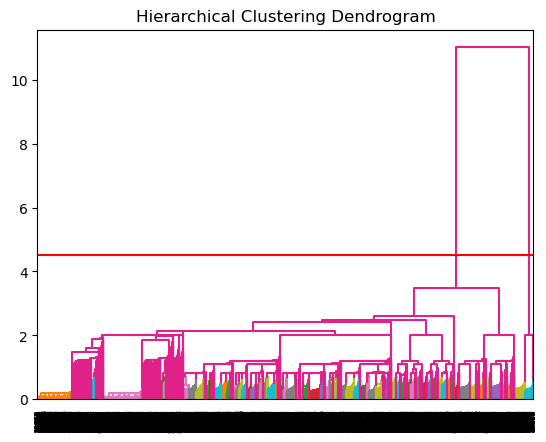

In [23]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(minimum_hierarchical, truncate_mode="level", p=50, color_threshold=0.7, above_threshold_color='#e0218a')
plt.axhline(y = 4.5, color = 'r', linestyle = '-')
plt.show()

In [24]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

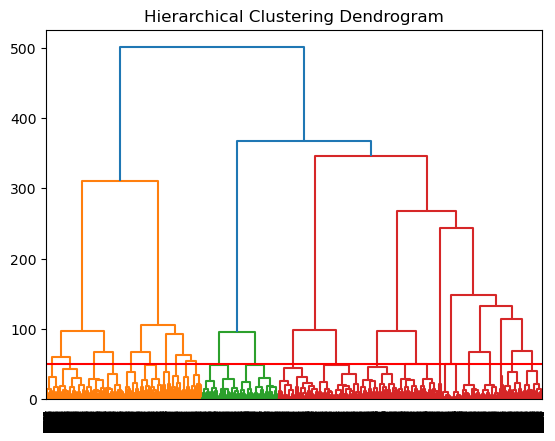

In [25]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 50, color = 'r', linestyle = '-')
plt.show()

In [27]:
num_cust_info['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=6
    ).fit_predict(scaled_data)
num_cust_info['cluster_single'] = AgglomerativeClustering(
    linkage='single', n_clusters=6
    ).fit_predict(scaled_data)

In [28]:
num_cust_info.groupby(['cluster_ward']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female,cluster_kmeans,cluster_single
cluster_ward,,,,,,,,,,,,,,,,,,,
0,0.268683,0.211526,0.386162,2.282774,2768.309931,583.980492,262.123505,296.853589,444.240703,335.486575,1587.463585,102.335993,222.318558,0.146248,2011.315231,38.558423,0.503800,1.214851,0.143129
1,3.078852,1.811656,0.933576,3.007285,4997.018856,200.006642,602.098779,900.787872,500.900364,1100.662738,1101.494750,500.748018,2001.371759,0.200119,2009.948361,55.526034,0.500107,0.005571,0.001714
2,1.160525,0.771495,0.310885,2.000212,997.551461,50.036637,1499.739094,20.005294,20.117535,0.000000,0.000000,100.033037,199.708598,0.049988,2010.014824,55.336934,0.490470,5.000000,0.000000
3,1.000203,0.069904,1.010567,20.001829,302.959764,20.000000,300.231863,300.431823,199.776671,151.107702,149.465962,50.032514,499.575493,0.499966,2010.019508,55.229831,0.491567,2.000000,2.000000
4,0.997901,0.271620,1.551008,7.999580,14993.307935,199.970403,799.560034,900.786104,599.145886,1501.016583,1498.781276,199.985306,4011.462636,0.149955,2000.006507,55.573048,0.499790,4.000000,0.000000
5,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,20.033623,1500.946855,499.866161,57.739913,58.946421,49.912148,99.785249,0.100002,2009.978091,55.672234,0.494143,3.000000,1.000000


In [30]:
#Starting with the Ward vs. k-means:
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_kmeans, num_cust_info.cluster_ward),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
K-means 0 Cluster,0,4647,0,0,0,0,0
K-means 1 Cluster,5914,18,0,0,0,0,0
K-means 2 Cluster,159,0,0,4921,0,0,0
K-means 3 Cluster,0,0,0,0,0,4610,0
K-means 4 Cluster,0,2,0,0,4764,0,0
K-means 5 Cluster,17,0,4722,0,0,0,0
K-means 6 Cluster,226,0,0,0,0,0,0


In [32]:
# Checking the single Linkage vs. K-Means
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_kmeans, num_cust_info.cluster_single),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Single {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Single 0 Cluster,Single 1 Cluster,Single 2 Cluster,Single 3 Cluster,Single 4 Cluster,Single 5 Cluster,Single 6 Cluster
K-means 0 Cluster,4645,0,0,1,0,1,0
K-means 1 Cluster,5932,0,0,0,0,0,0
K-means 2 Cluster,159,0,4921,0,0,0,0
K-means 3 Cluster,0,4610,0,0,0,0,0
K-means 4 Cluster,4766,0,0,0,0,0,0
K-means 5 Cluster,4739,0,0,0,0,0,0
K-means 6 Cluster,0,0,0,0,226,0,0


## 6. Self Organizing Maps

In [36]:
som = MiniSom(
    15, 
    15, 
    17,
    sigma=0.5,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

In [37]:
# Set the seed of Numpy just to be sure of replicability
np.random.seed(42)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(scaled_data, i)
    q_errors.append(som.quantization_error(scaled_data))

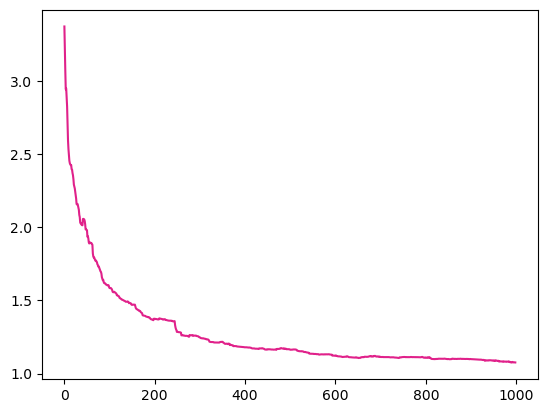

In [38]:
plt.plot(q_errors, color='#e0218a')

## 7. DBSCAN

In [ ]:
num_cust_info['dbscan_clustering'] = DBSCAN(
    eps=9, min_samples=5
    ).fit_predict(num_cust_info[['age','annual_income']])

## 8. Mean Shift